In [201]:
import fastf1 as ff1
import pandas as pd
import numpy as np

In [202]:
ff1.Cache.enable_cache('../cache')

In [234]:
def get_quali_results(year, round_number):
    session = ff1.get_session(year, round_number, 'Q')
    session.load(laps = False, telemetry = False, weather = False, messages = False)
    return session.results

def get_qualifying_gaps(quali_results):
    times = quali_results[pd.isnull(quali_results['Q3']) == False]['Q3']
    if len(times) == 0:
        raise Exception('No Q3 times found')
    pole = times.iloc[0]
    times = times.apply(lambda x: x - pole)
    times = times.apply(lambda x: x.total_seconds())
    percentage_gaps = times.apply(lambda x: x / pole.total_seconds() * 100)
    #percentage_gaps = percentage_gaps.apply(lambda x: round(x, 3))
    return percentage_gaps.values

def get_average_qualifying_gaps(quali_sessions, filename = None):
    gaps = []
    for quali_results in quali_sessions:
        try :
            gap_season = get_qualifying_gaps(quali_results)
            gaps.append(gap_season)
        except:
            print('No Q3 times found')
            pass
    gaps = pd.DataFrame(gaps)
    if filename is not None:
        gaps.to_csv(filename)
    return gaps.median(axis = 0).values

def get_average_qualifying_gaps_by_year(year, filename = None):
    quali_sessions = []
    len_season = len(ff1.get_event_schedule(year))
    for i in range(len_season):
        try:
            quali_sessions.append(get_quali_results(year, i + 1))
        except:
            print('Could not get results for round ' + str(i + 1) + ' of ' + str(year) + ' season')
            pass
    return get_average_qualifying_gaps(quali_sessions, filename)

def get_average_qualifying_gaps_by_years(years, filename = None):
    gaps = pd.DataFrame()
    for year in years:
        if filename is not None:
            gaps[year] = get_average_qualifying_gaps_by_year(year, filename = filename + str(year) + '_median.csv')
        else:
            gaps[year] = get_average_qualifying_gaps_by_year(year)
        # checkpoint in csv
        gaps.to_csv('../data/qualifying_gaps_test.csv')
    return gaps

In [235]:
gaps_by_year = get_average_qualifying_gaps_by_years(range(2014, 2015))#, filename = '../data/qualifying_gaps_')

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.0.7]
core           INFO 	Finished loading data for 22 drivers: ['44', '3', '6', '20', '14', '25', '27', '26', '19', '77', '22', '7', '1', '99', '10', '11', '4', '17', '21', '9', '8', '13']
core           INFO 	Loading data for Malaysian Grand Prix - Qualifying [v3.0.7]
core           INFO 	Finished loading data for 22 drivers: ['44', '1', '6', '14', '3', '7', '27', '20', '25', '22', '26', '21', '19', '11', '77', '8', '13', '99', '17', '10', '4', '9']
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.0.7]
core           INFO 	Finished loading data for 22 drivers: ['6', '44', '3', '77', '11', '7', '22', '19', '20', '14', '1', '27', '26', '25', '21', '8', '13', '99', '10', '17', '9', '4']
core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.0.7]
core           INFO 	Finished loading data for 22 drivers: ['44', '3', '1', '6', '14', '19', '77', '27', '25', '8', '7', '22

In [93]:
gaps_by_year_copy = gaps_by_year.copy()

In [101]:
gaps_by_year_copy.set_index(
    np.arange(1, len(gaps_by_year_copy) + 1),
    inplace = True)

In [127]:
gaps_by_year_copy.iloc[::].T

,1,2,3,4,5,6,7,8,9,10
2015,0.0,0.328524,0.794068,1.044737,1.265543,1.439545,1.674872,1.943324,2.078035,2.525547
2016,0.0,0.351198,0.745830,0.993170,1.254598,1.444871,1.701387,1.949892,2.209440,3.446346
2017,0.0,0.267420,0.518121,0.787601,1.152738,1.513692,1.945450,2.100230,2.311589,2.677044
2018,0.0,0.218571,0.567755,0.771576,1.151123,1.573748,1.991876,2.166178,2.651726,3.117141
2019,0.0,0.259586,0.476041,0.677059,0.960006,1.224370,1.603625,1.805433,2.174172,2.496399
2020,0.0,0.279389,0.789593,1.128672,1.375030,1.570343,1.645196,1.761599,2.022097,2.336147
2021,0.0,0.253441,0.466459,0.757165,0.866236,0.987863,1.162831,1.372930,1.597485,3.102121
2022,0.0,0.263712,0.384207,0.685583,1.047685,1.234648,1.421258,1.616238,2.647378,3.384538
2023,0.0,0.339323,0.494762,0.659932,0.774509,0.881068,1.008607,1.227204,1.532035,1.845162


In [113]:
gaps_by_year_copy.iloc[::]

,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.328524,0.351198,0.267420,0.218571,0.259586,0.279389,0.253441,0.263712,0.339323
3,0.794068,0.745830,0.518121,0.567755,0.476041,0.789593,0.466459,0.384207,0.494762
4,1.044737,0.993170,0.787601,0.771576,0.677059,1.128672,0.757165,0.685583,0.659932
5,1.265543,1.254598,1.152738,1.151123,0.960006,1.375030,0.866236,1.047685,0.774509
6,1.439545,1.444871,1.513692,1.573748,1.224370,1.570343,0.987863,1.234648,0.881068
7,1.674872,1.701387,1.945450,1.991876,1.603625,1.645196,1.162831,1.421258,1.008607
8,1.943324,1.949892,2.100230,2.166178,1.805433,1.761599,1.372930,1.616238,1.227204
9,2.078035,2.209440,2.311589,2.651726,2.174172,2.022097,1.597485,2.647378,1.532035
10,2.525547,3.446346,2.677044,3.117141,2.496399,2.336147,3.102121,3.384538,1.845162


/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_7057/1233437502.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


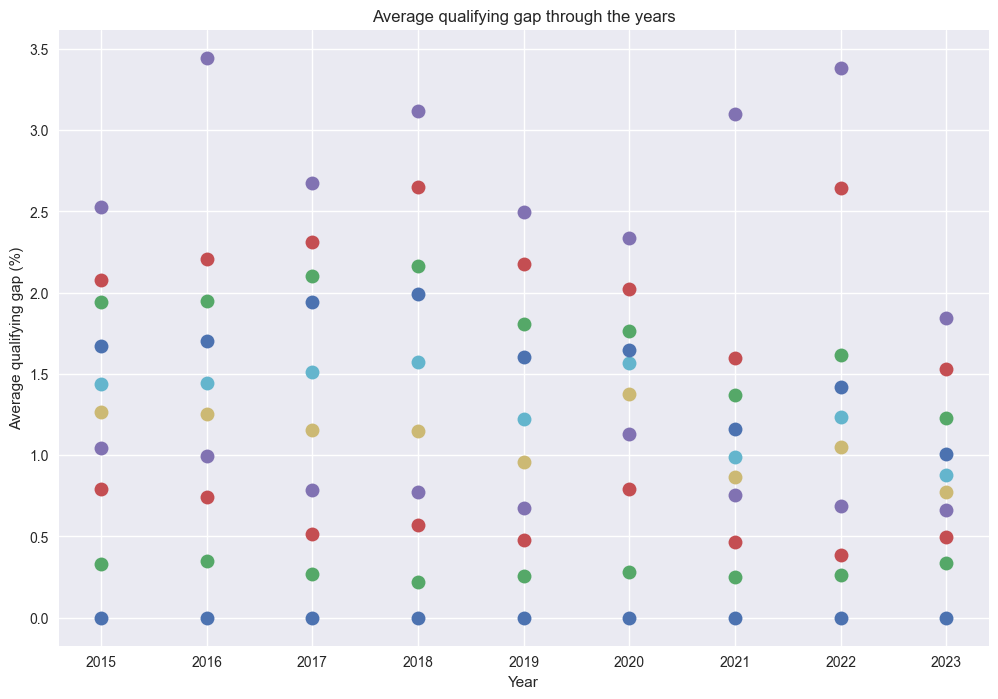

In [146]:
# Plot the average qualifying gaps through the years
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Plot is dot plot
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(gaps_by_year_copy.iloc[::].T, marker = 'o', linestyle = '', markersize = 10)
ax.set_xlabel('Year')
ax.set_ylabel('Average qualifying gap (%)')
ax.set_title('Average qualifying gap through the years')
plt.show()

In [58]:
res = get_quali_results(2019, 1)

times = res[pd.isnull(res['Q3']) == False]['Q3']
pole = times.iloc[0]
times = times.apply(lambda x: x - pole)
times = times.apply(lambda x: x.total_seconds())

print(times)
percentage_gaps = times.apply(lambda x: x / pole.total_seconds() * 100).values
print(percentage_gaps)

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '5', '33', '16', '8', '20', '4', '7', '11', '27', '3', '23', '99', '26', '18', '10', '55', '63', '88']


44    0.000
77    0.112
5     0.704
33    0.834
16    0.956
8     1.340
20    1.613
4     1.818
7     1.828
11    2.295
Name: Q3, dtype: float64
[0.         0.13915464 0.87468628 1.03620505 1.18778421 1.66488582
 2.00407524 2.25877792 2.27120245 2.85142758]


In [50]:
times

44          0 days 00:00:00
77   0 days 00:00:00.112000
5    0 days 00:00:00.704000
33   0 days 00:00:00.834000
16   0 days 00:00:00.956000
8    0 days 00:00:01.340000
20   0 days 00:00:01.613000
4    0 days 00:00:01.818000
7    0 days 00:00:01.828000
11   0 days 00:00:02.295000
Name: Q3, dtype: timedelta64[ns]

In [236]:
import pandas as pd

# Load the CSV file to examine its structure
file_path = '../data/qualifying_gaps_median.csv'
qualifying_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
qualifying_data.head()

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.21,0.322407,0.322728,0.211568,0.162578,0.204687,0.133069,0.227079,0.242986,0.181613
2,2,0.70,0.817414,0.613893,0.505140,0.412089,0.379831,0.770286,0.426333,0.327022,0.418310
3,3,0.90,1.026667,0.859703,0.727832,0.636698,0.631604,1.109480,0.656139,0.502637,0.513793
4,4,1.30,1.222629,1.136747,1.069978,0.891117,1.008354,1.237620,0.853130,0.974125,0.700595


In [153]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


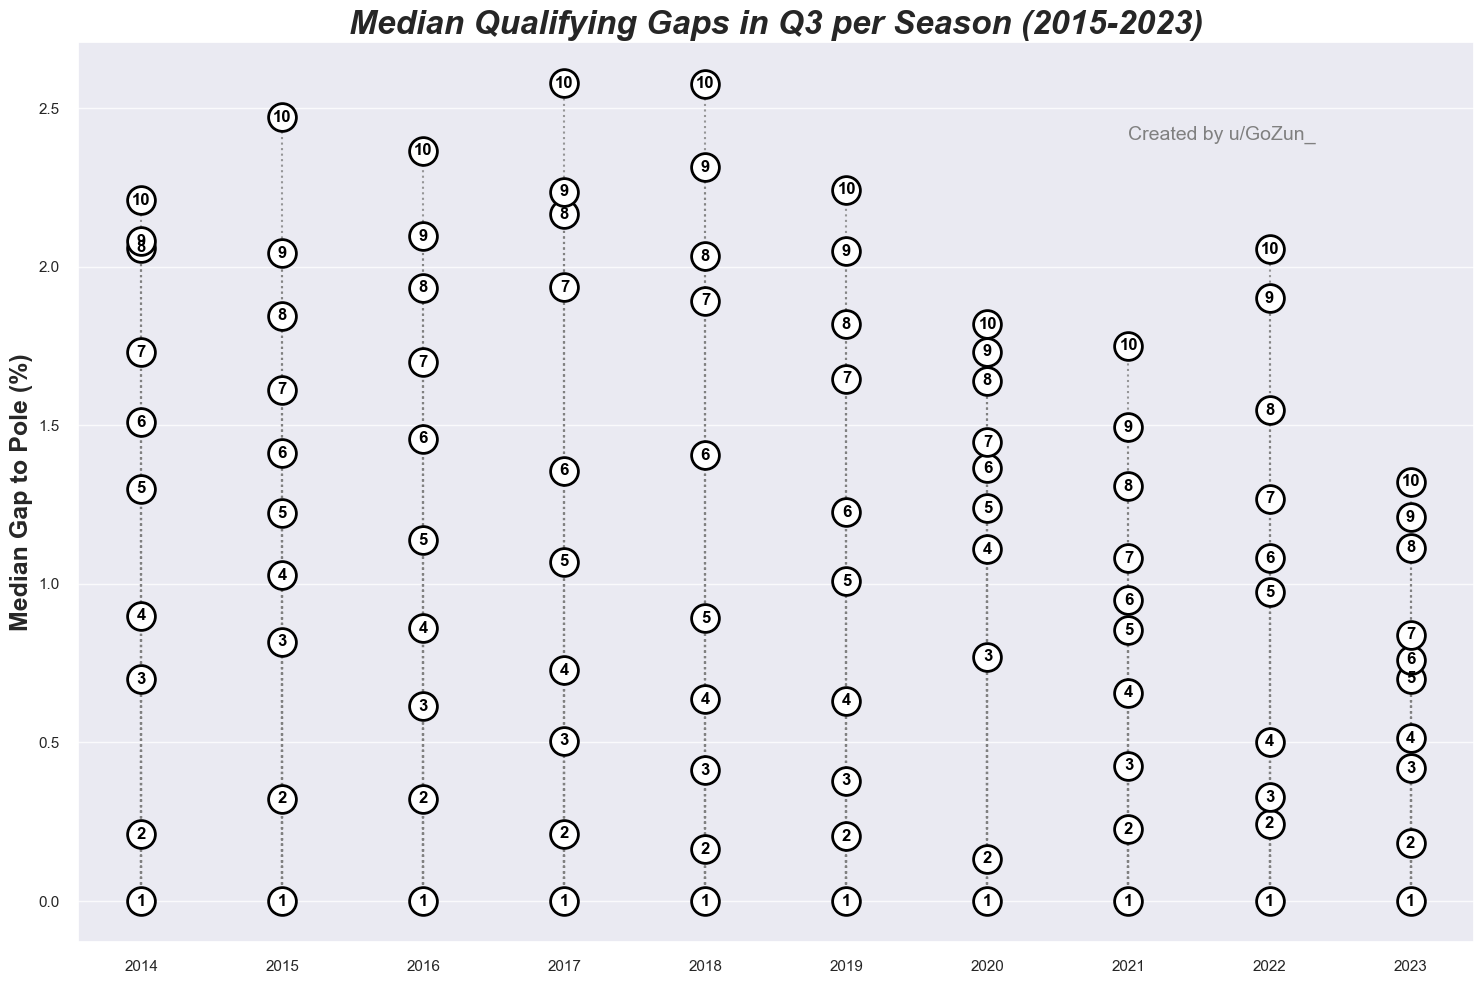

In [237]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the style for the plot
sns.set(style="dark")

# Preparing data for plotting
# Transposing the data to make each column a year and each row a position
qualifying_transposed = qualifying_data.drop(columns=["Unnamed: 0"]).T
# Resetting index to turn the years into a column
qualifying_transposed.reset_index(inplace=True)
# Renaming columns for clarity
qualifying_transposed.columns = ['Year', 'Pos1', 'Pos2', 'Pos3', 'Pos4', 'Pos5', 'Pos6', 'Pos7', 'Pos8', 'Pos9', 'Pos10']

# Melting the dataframe to have a long format for seaborn
qualifying_melted = qualifying_transposed.melt(id_vars=["Year"], var_name="Position", value_name="Average Gap")

# Converting 'Position' to numerical format for sorting
qualifying_melted['Position'] = qualifying_melted['Position'].str.extract('(\d+)').astype(int)

# Plotting
plt.figure(figsize=(15, 10))
plot = sns.scatterplot(x="Year", y="Average Gap", s=400,
                       color="white", edgecolor="black", linewidth=2, alpha=1,
                       data=qualifying_melted, zorder=2)

# Adding labels inside the circles
for line in range(0,qualifying_melted.shape[0]):
     plot.text(qualifying_melted.Year[line], qualifying_melted["Average Gap"][line], 
     qualifying_melted.Position[line], horizontalalignment='center', verticalalignment='center',
     size='medium', color='black', weight='semibold', zorder=2)

# Adding lines to connect the dots vertically
plot.vlines(x=qualifying_melted['Year'], ymin=0, ymax=qualifying_melted['Average Gap'], color='grey', alpha=0.8, zorder=1, linestyles='dotted')

# Setting plot title and labels
plt.title('Median Qualifying Gaps in Q3 per Season (2015-2023)', fontsize=24, weight='bold', style='italic')
plt.xlabel('')
plt.ylabel('Median Gap to Pole (%)', fontsize=18, weight='bold')
plt.grid(axis='y', alpha=0.8, zorder=-1)



# Adding the author's name as legend
plot.text(7, 2.4, 'Created by u/GoZun_', color='grey', fontsize=14, zorder=2)

plt.tight_layout()
# Show the plot
plt.show()

# Save the plot
plot.figure.savefig('qualifying_gaps_median.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
